Importing all libraries

In [60]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
np.random.seed(0)


Defining mix of different normal distributions

In [61]:
def mix_normal(m1, s1, m2, s2, w1, w2):
  #Generate points on x axis for plotting
  x = np.linspace(-5,10,1000)

  #Calculate the individual normal distributions
  n1 = norm.pdf(x,m1,s1)
  n2 = norm.pdf(x,m2,s2)

  #Calculate the mixture of the normal distributions
  mixture = w1 * n1 + w2 * n2

  #Plotting the results
  plt.plot(x,n1,label = 'Normal distribution 1', linestyle='--')
  plt.plot(x,n2,label='Normal distribution 2', linestyle='--')
  plt.plot(x,mixture,label='Mixture model',color='black')
  plt.xlabel('$x$')
  plt.ylabel('$p(x)$')
  plt.legend()


Implementing the mixture of normal distributions

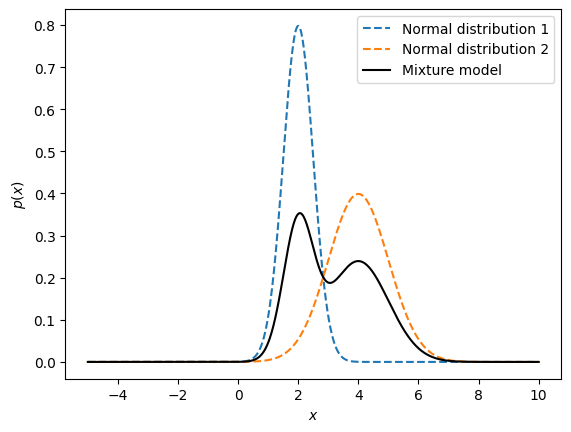

In [62]:
#Parameters for the univariate normal distributions
m1 = 2
s1 = 0.5
m2 = 4
s2 = 1
w1,w2 = 0.4,0.6

mix_normal(m1,s1,m2,s2,w1,w2)

Initialising parameters for further fine-tuning using expectation maximisation process

In [63]:
def init_params(x):
  mean1 = 3
  mean2 = 2
  std1 = 1
  std2 = 1

  w1 = 0.5
  w2 = 0.5

  return mean1, mean2, std1, std2, w1, w2

Expectation maximisation process for finding the actual parameters for each component normal distribution for the intial guess parameters

In [64]:
def expect(x,mean1,mean2,std1,std2,w1,w2):
  """The responsibilities for formula is as follows:
    Responsibilty of gaussian 1 pointing to x = (Probability of gaussian 1 pointing to x * weight of gaussian 1) / Probability that either of the 2 gaussians point to x """
  res1 = norm(mean1,std1).pdf(x) * w1
  res2 = norm(mean2,std2).pdf(x) * w2
  res_total = res1 + res2
  #Updating both the responsibilities as original responsibility / summation of all original responsibilities
  res1 = res1/res_total
  res2 = res2/res_total
  return res1, res2

#Maximisation step
def maximise(x,res1,res2):
  "Updating the mean based on dot product of points with responsibility/ summation of all the responsibilities"
  mean1 = np.dot(res1,x)/np.sum(res1)
  mean2 = np.dot(res2,x)/np.sum(res2)

  "Each gaussian spread or standard deviation is carried out as weighted average of square distances of points again using responsibilities as weights"
  std1 = np.sqrt(np.dot(res1, (x-mean1)**2)/np.sum(res1))
  std2 = np.sqrt(np.dot(res2, (x-mean2)**2)/ np.sum(res1))

  "Update the weights of both gaussians based on the responsibilities"
  w1 = np.sum(res1)/len(x)
  w2 = 1 - w1
  return mean1, std1, mean2, std2, w1, w2



Gaussian mixture model estimation using iterations

In [65]:
def gmm(x, max_iter=100):
    """Gaussian mixture model estimation via expectation-maximisation"""
    mean1, mean2, std1, std2, w1, w2 = init_params(x)

    for i in range(max_iter):
        print(f"Iteration {i}: μ1 = {mean1:.3f}, σ1 = {std1:.3f}, μ2 = {mean2:.3f}, σ2 = {std2:.3f}, w1 = {w1:.3f}, w2 = {w2:.3f}")

        # Expectation step
        res1, res2 = expect(x, mean1, mean2, std1, std2, w1, w2)

        # Maximization step
        mean1, std1, mean2, std2, w1, w2 = maximise(x, res1, res2)

    return mean1, mean2, std1, std2, w1, w2


Sample data

In [66]:
def sample_data(mean1, std1, mean2, std2, w1, w2, n_samples):
  x = np.zeros(n_samples)
  for i in range(n_samples):
    if np.random.rand() < w1:
      x[i] = np.random.normal(mean1, std1)
    else:
      x[i] = np.random.normal(mean2,std2)

  return x


In [67]:
#parameters and sample data initialising
mean1, std1 = -1,1
mean2, std2 = 4, 1.5
w1, w2 = 0.7, 0.3

x = sample_data(mean1, std1, mean2, std2, w1, w2, n_samples=1000)
final_params = gmm(x, max_iter=30)


Iteration 0: μ1 = 3.000, σ1 = 1.000, μ2 = 2.000, σ2 = 1.000, w1 = 0.500, w2 = 0.500
Iteration 1: μ1 = 4.021, σ1 = 1.859, μ2 = -0.664, σ2 = 2.559, w1 = 0.283, w2 = 0.717
Iteration 2: μ1 = 4.184, σ1 = 1.681, μ2 = -0.517, σ2 = 3.111, w1 = 0.251, w2 = 0.749
Iteration 3: μ1 = 4.300, σ1 = 1.513, μ2 = -0.286, σ2 = 4.033, w1 = 0.207, w2 = 0.793
Iteration 4: μ1 = 4.316, σ1 = 1.338, μ2 = -0.049, σ2 = 5.198, w1 = 0.163, w2 = 0.837
Iteration 5: μ1 = 4.297, σ1 = 1.173, μ2 = 0.092, σ2 = 6.088, w1 = 0.136, w2 = 0.864
Iteration 6: μ1 = 4.288, σ1 = 1.043, μ2 = 0.152, σ2 = 6.561, w1 = 0.123, w2 = 0.877
Iteration 7: μ1 = 4.287, σ1 = 0.952, μ2 = 0.178, σ2 = 6.785, w1 = 0.118, w2 = 0.882
Iteration 8: μ1 = 4.288, σ1 = 0.891, μ2 = 0.190, σ2 = 6.904, w1 = 0.115, w2 = 0.885
Iteration 9: μ1 = 4.289, σ1 = 0.849, μ2 = 0.198, σ2 = 6.980, w1 = 0.113, w2 = 0.887
Iteration 10: μ1 = 4.289, σ1 = 0.820, μ2 = 0.204, σ2 = 7.037, w1 = 0.112, w2 = 0.888
Iteration 11: μ1 = 4.290, σ1 = 0.799, μ2 = 0.209, σ2 = 7.082, w1 = 0.11

Plotting the mixture

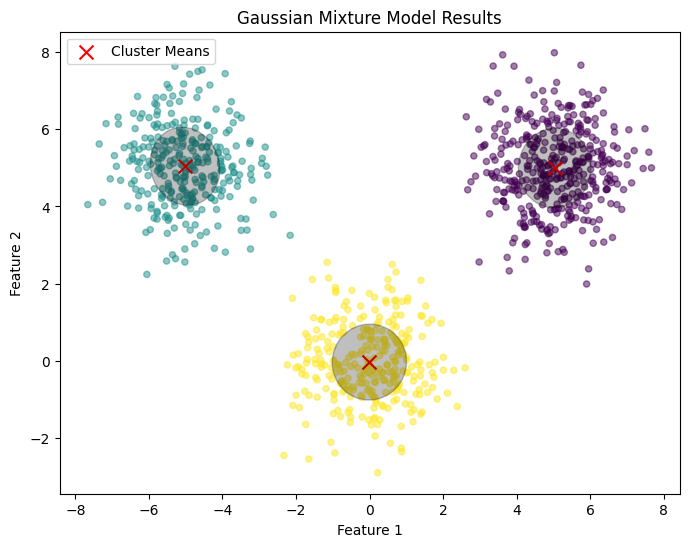

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture


def plot_gmm_results(X, gmm, title="Gaussian Mixture Model Results"):
    plt.figure(figsize=(8, 6))

    # Predict cluster labels for each point
    labels = gmm.predict(X)

    # Plot the data points, colored by cluster
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', alpha=0.5)

    # Plot the means
    plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
                c='red', s=100, marker='x', label='Cluster Means')

    # Draw ellipses to represent covariances
    for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
        draw_ellipse(mean, cov, color='black', alpha=0.25)

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

def draw_ellipse(position, covariance, color, alpha=0.3):
    """Draw an ellipse to represent the covariance matrix"""
    if covariance.shape == (2, 2):
        # Compute eigenvalues and eigenvectors
        vals, vecs = np.linalg.eigh(covariance)
        # Sort eigenvalues in descending order
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        # Compute ellipse angle and radii
        theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(vals)
        ell = Ellipse(xy=position, width=width, height=height,
                      angle=theta, color=color, alpha=alpha)
        plt.gca().add_artist(ell)
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

#  Create synthetic data (3 Gaussians)
true_means = [np.array([0, 0]), np.array([5, 5]), np.array([-5, 5])]
true_covs = [np.eye(2), np.eye(2), np.eye(2)]
true_weights = [0.3, 0.4, 0.3]

n_samples = 1000

X = np.vstack([
    np.random.multivariate_normal(mean, cov, int(w * n_samples))
    for mean, cov, w in zip(true_means, true_covs, true_weights)
])

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

plot_gmm_results(X, gmm)
